<a href="https://colab.research.google.com/github/piyush1856/neural-network/blob/main/_4Tensorflow_%26_Keras_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
!wget "https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU" -O healthyfime.csv

--2025-12-15 16:30:23--  https://drive.google.com/uc?export=download&id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
Resolving drive.google.com (drive.google.com)... 192.178.212.139, 192.178.212.113, 192.178.212.101, ...
Connecting to drive.google.com (drive.google.com)|192.178.212.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download [following]
--2025-12-15 16:30:23--  https://drive.usercontent.google.com/download?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.214.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 761835 (744K) [application/octet-stream]
Saving to: ‘healthyfime.csv’

healthyfime.csv     100%[===================>] 743.98K  --

In [3]:
df = pd.read_csv("healthyfime.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


## EDA

In [5]:
df.replace({"M":0, "F":1} , inplace = True)
df.head()

/tmp/ipython-input-1045767759.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"M":0, "F":1} , inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [6]:
classes = list(df['class'].unique())
mapping_dict = { ch : i for i, ch in enumerate(sorted(classes, reverse=True)) }
print (mapping_dict)
df['class'].replace(mapping_dict , inplace = True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


/tmp/ipython-input-3995772334.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['class'].replace(mapping_dict , inplace = True)
/tmp/ipython-input-3995772334.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'].replace(mapping_dict , inplace = True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


<Axes: >

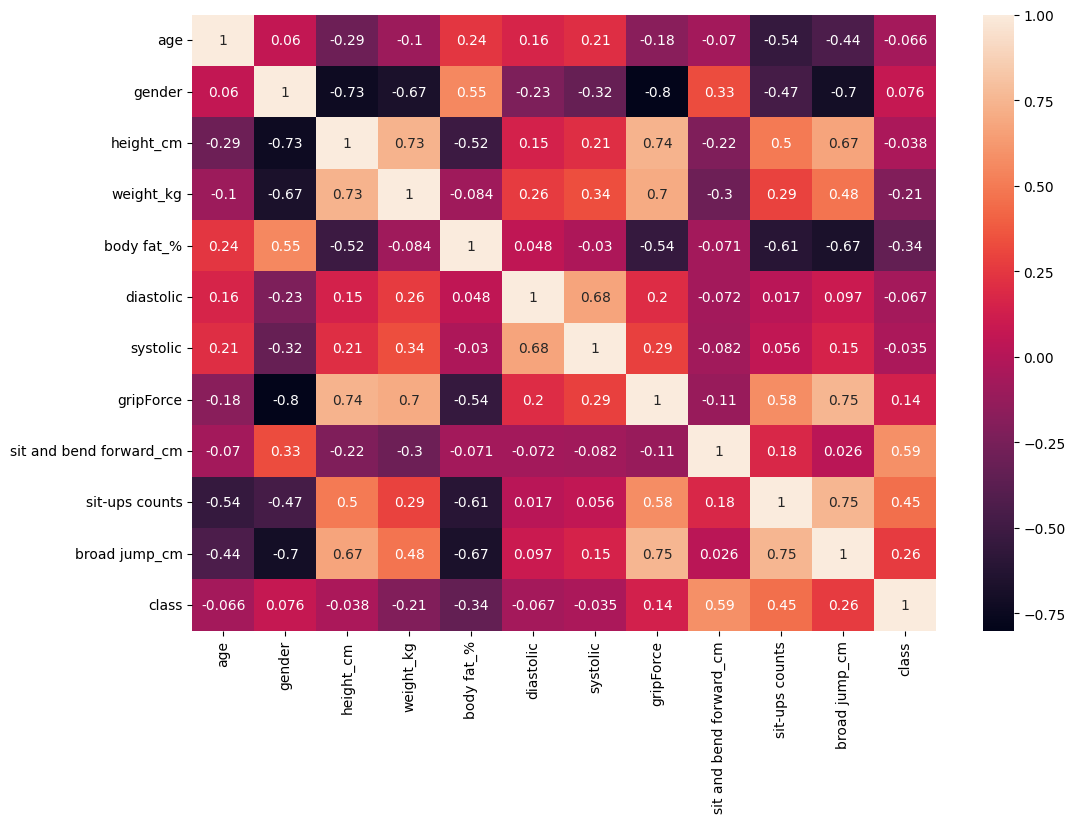

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<Axes: >

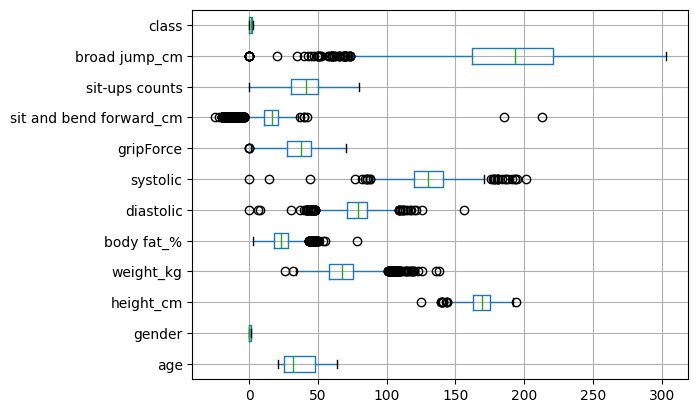

In [8]:
df.boxplot(rot = 0, vert=False)

In [9]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(13393, 11) (13393,)


In [10]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Valid : ', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (10847, 11) (10847,)
Valid :  (1206, 11) (1206,)
Test  :  (1340, 11) (1340,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train,y_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

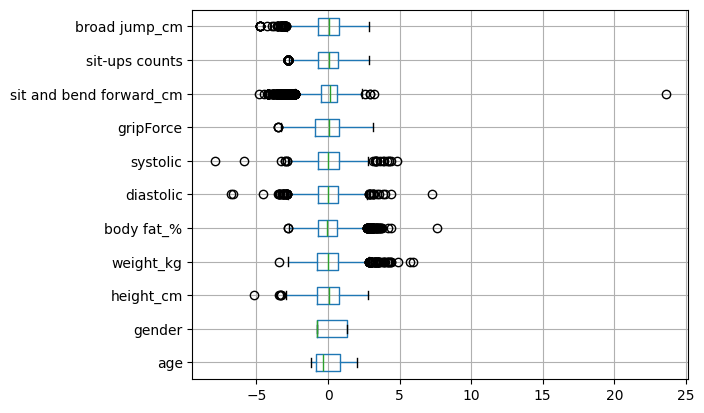

In [12]:
pd.DataFrame(X_train,columns=df.columns[:-1]).boxplot(rot = 0, vert=False)

## Tensorflow

In [13]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [14]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'RematScope',
 'Sequential',
 'StatelessScope',
 'SymbolicScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'remat',
 'tree',
 'utils',
 'version',
 'visualization',
 'wrappers']

In [15]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparse_sigmoid',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [16]:
dir(tf.data)

['AUTOTUNE',
 'Dataset',
 'DatasetSpec',
 'FixedLengthRecordDataset',
 'INFINITE_CARDINALITY',
 'Iterator',
 'IteratorSpec',
 'NumpyIterator',
 'Options',
 'TFRecordDataset',
 'TextLineDataset',
 'ThreadingOptions',
 'UNKNOWN_CARDINALITY',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

### Keras Sequential API

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential([
                    Dense(64, activation="relu"), #hidden dense layer with 64 neuron units
                    Dense(4, activation="softmax") #output layer with 4 units and softmax activation
])

In [21]:
model.weights

[]

In [22]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,)),
                    Dense(4, activation="softmax")
])

In [23]:
type(model.weights)

list

In [24]:
for param in model.weights:
  print(param.shape)

(11, 64)
(64,)
(64, 4)
(4,)


In [25]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(11,)))
model.add(Dense(4, activation="softmax"))

In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028 (4.02 KB)

 Trainable params: 1,028 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Custom name to the layers
model = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(4, activation="softmax", name="output")
])

In [30]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028 (4.02 KB)

 Trainable params: 1,028 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

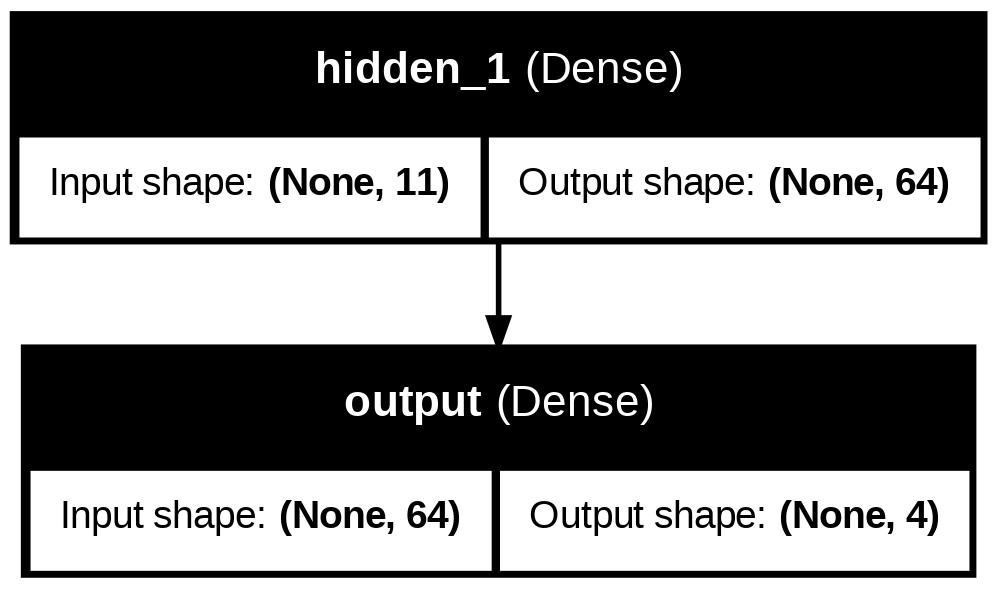

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model,
    to_file='model.png',
    show_shapes=True, show_layer_names=True)

In [32]:
model_X = Sequential([
                    Dense(64, activation="relu", input_shape=(11,), name="hidden_1", kernel_initializer='random_uniform', bias_initializer="zeros"),
                    Dense(4, activation="softmax", name="output", kernel_initializer='he_uniform', bias_initializer='ones')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
Dense(64, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
          bias_initializer=tf.keras.initializers.Constant(value=0.4),
          activation='relu')

<Dense name=dense_10, built=False>

In [34]:
model.layers

[<Dense name=hidden_1, built=True>, <Dense name=output, built=True>]

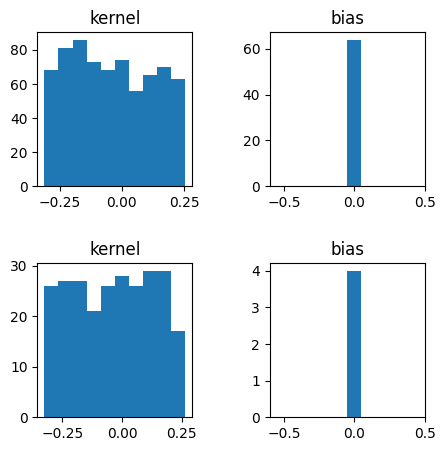

In [35]:
# Plot histograms of weight and bias values
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# get the weights from the layers
weight_layers = [layer for layer in model.layers]
for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

### Compile - loss and optimizer

In [36]:
model_2C = Sequential([
          Dense(64, activation="relu", input_shape=(11,)),
          Dense(1, activation="sigmoid")])

# new piece of code
model_2C.compile(
    optimizer = "adam", # stochastic gradient descent, adam, rmsprop, adadelts
    loss = "binary_crossentropy", # sigmoid loss, # mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
    metrics = ["accuracy"])

In [37]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
)

In [38]:
model = Sequential([
                    Dense(16, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(8, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [39]:
model.loss

<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x79acfd346b60>, kwargs={'from_logits': False, 'ignore_class': None, 'axis': -1})>

In [40]:
model.optimizer

In [41]:
def seed_everything(seed = 42):
    np.random.seed(seed)
    tf.random.set_seed(seed)


seed_everything()

In [42]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.1, verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2628 - loss: 1.4172 - val_accuracy: 0.2839 - val_loss: 1.3845
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3222 - loss: 1.3582 - val_accuracy: 0.3401 - val_loss: 1.3331
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3702 - loss: 1.3100 - val_accuracy: 0.3834 - val_loss: 1.2831
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4174 - loss: 1.2597 - val_accuracy: 0.4341 - val_loss: 1.2240
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4798 - loss: 1.1962 - val_accuracy: 0.4912 - val_loss: 1.1468
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5201 - loss: 1.1197 - val_accuracy: 0.5226 - val_loss: 1.0701
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5545 - loss: 1.0458 - val_accuracy: 0.5401 - val_loss: 1.0059
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 0.9869 - val_accuracy: 0.5521 - val_loss

In [43]:
%%time
history = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_split=0.1, verbose=1)

## no of iterations: ( 10847 (training size) - 1084.7 (validation split) )/(256) == 39

Epoch 1/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6021 - loss: 0.8969 - val_accuracy: 0.5945 - val_loss: 0.8938
Epoch 2/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6114 - loss: 0.8831 - val_accuracy: 0.6065 - val_loss: 0.8821
Epoch 3/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6179 - loss: 0.8720 - val_accuracy: 0.6083 - val_loss: 0.8724
Epoch 4/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6263 - loss: 0.8623 - val_accuracy: 0.6129 - val_loss: 0.8636
Epoch 5/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6287 - loss: 0.8536 - val_accuracy: 0.6129 - val_loss: 0.8553
Epoch 6/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6350 - loss: 0.8457 - val_accuracy: 0.6175 - val_loss: 0.8473
Epoch 7/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6386 - loss: 0.8384 - val_accuracy: 0.6221 - val_loss: 0.8403
Epoch 8/500
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6422 - loss: 0.8316 - val_accuracy: 0.6295 

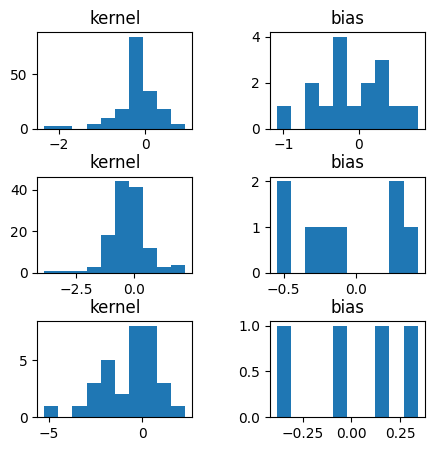

In [44]:
# Plot histograms of weight and bias values after training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# get the weights from the layers
weight_layers = [layer for layer in model.layers]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [45]:
def create_model():
    model = Sequential([
                    Dense(32, activation="relu", input_shape=(11,), name="hidden_1"),
                    Dense(16, activation="relu", name="hidden_2"),
                    Dense(4, activation="softmax", name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"])
    return model

model = create_model()

In [46]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=500, batch_size=512, verbose=0)

In [47]:
history.__dict__.keys()

dict_keys(['params', '_model', 'history', 'epoch'])

In [48]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [49]:
epochs = history.epoch
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

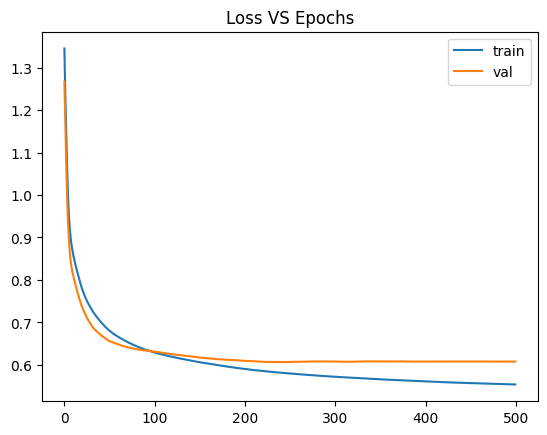

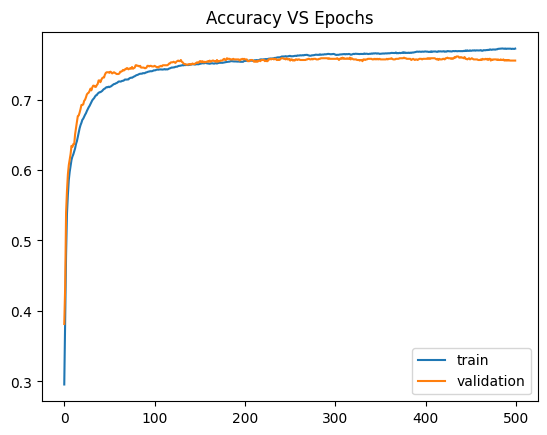

In [50]:
plt.figure()
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.show()

plt.figure()
plt.plot(epochs, accuracy, label="train")
plt.plot(epochs, val_accuracy, label="validation")
plt.legend()
plt.title("Accuracy VS Epochs")
plt.show()